<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 03
# **Curso Modelamiento Predictivo**
---
### **Modelos No Supervisados**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

### Carga de Datos

In [31]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/'
import os
os.listdir(ruta)

['Inteligencia Artificial para Telemedicina.pptx',
 'modpred__01.ipynb',
 'uc__pnp__ejemplo_100.xlsx',
 'modpred__02.ipynb',
 'uc_modpred_materiales',
 'modpred__03.ipynb']

In [32]:
data = pd.read_excel(ruta + 'uc__pnp__ejemplo_100.xlsx')
data.head()

,hora,sexo,edad,canal,tipo
0,0,Masculino,24,teléfono,infracción
1,23,Femenino,59,efectivo,robo
2,9,Femenino,71,personal,violencia
3,24,Masculino,23,formulario web,infracción
4,13,Masculino,40,personal,infracción


### Complemento y Preparación

In [33]:
fac_tipo = pd.factorize(data.tipo)
fac_canal = pd.factorize(data.canal)
fac_sexo = pd.factorize(data.sexo)
data['fac_tipo'] = fac_tipo[0]
data['fac_canal'] = fac_canal[0]
data['fac_sexo'] = fac_sexo[0]
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo
0,0,Masculino,24,teléfono,infracción,0,0,0
1,23,Femenino,59,efectivo,robo,1,1,1
2,9,Femenino,71,personal,violencia,2,2,1
3,24,Masculino,23,formulario web,infracción,0,3,0
4,13,Masculino,40,personal,infracción,0,2,0


In [34]:
data100 = data.drop(['sexo', 'edad', 'canal', 'tipo'], axis=1)
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo
0,0,0,0,0
1,23,1,1,1
2,9,2,2,1
3,24,0,3,0
4,13,0,2,0


In [35]:
X = data100.drop(['fac_tipo'], axis=1)
X.head()

,hora,fac_canal,fac_sexo
0,0,0,0
1,23,1,1
2,9,2,1
3,24,3,0
4,13,2,0


In [50]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
transf = MinMaxScaler().fit(np.array(X))
X_tr = transf.transform(X)
X_tr.shape

(50, 3)

In [54]:
X_tr[0:5]

array([[0.        , 0.        , 0.        ],
       [0.95833333, 0.33333333, 1.        ],
       [0.375     , 0.66666667, 1.        ],
       [1.        , 1.        , 0.        ],
       [0.54166667, 0.66666667, 0.        ]])

In [55]:
fac_tipo[1]

Index(['infracción', 'robo', 'violencia', 'agresión sexual'], dtype='object')

### Modelo KMeans

In [56]:
modelo = KMeans(n_clusters=4)
modelo.fit(X_tr)
modelo.labels_

array([0, 1, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 0, 1, 1, 0, 3, 2, 2, 2,
       1, 3, 2, 2, 0, 2, 3, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 3, 3, 0], dtype=int32)

In [57]:
data100['clusters'] = modelo.labels_
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo,clusters,jitter
0,0,0,0,0,0,0.112307
1,23,1,1,1,1,0.055805
2,9,2,2,1,3,0.150376
3,24,0,3,0,2,0.017923
4,13,0,2,0,2,0.174328


In [58]:
data100['jitter'] = np.random.rand(50)/3
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo,clusters,jitter
0,0,0,0,0,0,0.278890
1,23,1,1,1,1,0.154986
2,9,2,2,1,3,0.260419
3,24,0,3,0,2,0.085072
4,13,0,2,0,2,0.225483


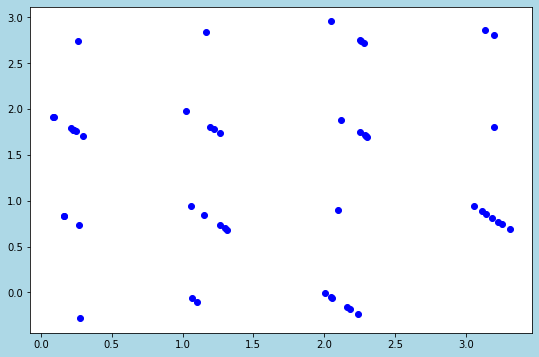

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6), facecolor='lightblue')
ax.plot(data100.fac_tipo+data100.jitter, data100.clusters-data100.jitter, 'ob')
plt.show()

In [86]:
data['clusters'] = data100.clusters
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,clusters,clust_dbscan
0,0,Masculino,24,teléfono,infracción,0,0,0,0,0
1,23,Femenino,59,efectivo,robo,1,1,1,1,1
2,9,Femenino,71,personal,violencia,2,2,1,3,1
3,24,Masculino,23,formulario web,infracción,0,3,0,2,0
4,13,Masculino,40,personal,infracción,0,2,0,2,0


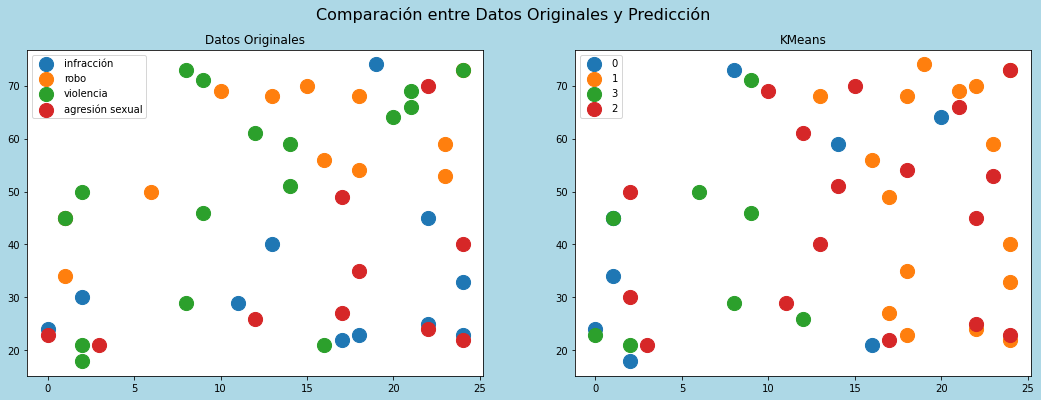

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='lightblue')

for item in data['tipo'].unique():
  datax = data[data['tipo'] == item]
  ax1.scatter(datax.hora, datax.edad, s=200, label=item)
  ax1.set_title('Datos Originales')
  ax1.legend()

for item in data['clusters'].unique():
  datax = data[data['clusters'] == item]
  ax2.scatter(datax.hora, datax.edad, s=200, label=item)
  ax2.set_title('KMeans')
  ax2.legend()

plt.suptitle('Comparación entre Datos Originales y Predicción', fontsize=16)
plt.show()

In [88]:
#@title Análisis detallado
data[data.clusters == 3]

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,clusters,clust_dbscan
2,9,Femenino,71,personal,violencia,2,2,1,3,1
5,6,Femenino,50,formulario web,robo,1,3,1,3,1
10,9,Femenino,46,formulario web,violencia,2,3,1,3,1
18,12,Femenino,26,formulario web,agresión sexual,3,3,1,3,1
23,8,Femenino,29,personal,violencia,2,2,1,3,1
28,1,Femenino,45,personal,infracción,0,2,1,3,1
47,2,Femenino,21,teléfono,violencia,2,0,1,3,1
48,0,Femenino,23,efectivo,agresión sexual,3,1,1,3,1


### Modelo DBSCAN

In [80]:
modelo = DBSCAN(eps=0.7, min_samples=3)
modelo.fit(X_tr)
modelo.labels_

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0])

In [81]:
data['clust_dbscan'] = modelo.labels_
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,clusters,clust_dbscan
0,0,Masculino,24,teléfono,infracción,0,0,0,0,0
1,23,Femenino,59,efectivo,robo,1,1,1,1,1
2,9,Femenino,71,personal,violencia,2,2,1,3,1
3,24,Masculino,23,formulario web,infracción,0,3,0,2,0
4,13,Masculino,40,personal,infracción,0,2,0,2,0


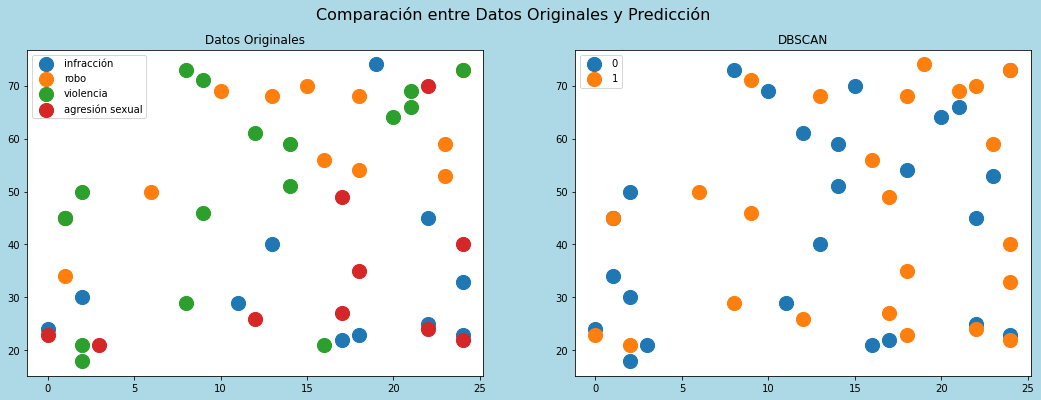

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='lightblue')

for item in data['tipo'].unique():
  datax = data[data['tipo'] == item]
  ax1.scatter(datax.hora, datax.edad, s=200, label=item)
  ax1.set_title('Datos Originales')
  ax1.legend()

for item in data['clust_dbscan'].unique():
  datax = data[data['clust_dbscan'] == item]
  ax2.scatter(datax.hora, datax.edad, s=200, label=item)
  ax2.set_title('DBSCAN')
  ax2.legend()

plt.suptitle('Comparación entre Datos Originales y Predicción', fontsize=16)
plt.show()